In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA



In [2]:
df = pd.read_csv('../../dataset/weatherClean.csv')

In [3]:
df.describe()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.221213,12.186400,2.349974,5.302343,7.377594,9.433756,39.984292,8.202239,9.092649,14.001988,18.637576,68.843810,51.482606,1017.653758,4.389750,4.258511,0.221213,0.224181,6.402544
std,0.064960,6.388924,8.423217,4.147637,3.898898,5.188836,13.138385,5.515461,5.107987,8.851082,8.721551,18.932077,20.532065,6.746248,2.879055,2.745819,0.415065,0.417043,3.426506
min,0.067224,-8.500000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.185234,7.600000,0.000000,2.400000,4.400000,5.000000,31.000000,3.000000,5.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,0.222714,12.000000,0.000000,4.400000,8.100000,9.000000,39.000000,8.000000,8.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,5.000000,5.000000,0.000000,0.000000,6.000000
75%,0.266917,16.800000,0.800000,7.200000,10.500000,15.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,7.000000,7.000000,0.000000,0.000000,9.000000
max,0.363151,33.900000,371.000000,145.000000,14.500000,18.000000,135.000000,18.000000,18.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,9.000000,9.000000,1.000000,1.000000,12.000000


In [4]:
X = df.drop('RainTomorrow', axis=1)
Y = df['RainTomorrow']

In [5]:
def find_boundaries(df, name):
    
    Q1=df[name].quantile(0.25)
    Q3=df[name].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary


In [6]:
def outliers(name,df):
    lower_rainfall, upper_rainfall = find_boundaries(df, name)
    print('Gornja granica', upper_rainfall)
    print('Donja granica', lower_rainfall)
    outliers_rainfall = np.where(df[name] > upper_rainfall, True,
                            np.where(df[name] < lower_rainfall, True, False))

    print(outliers_rainfall)
    return len(df[outliers_rainfall]), outliers_rainfall


In [7]:
l, out = outliers('WindSpeed3pm',X)
X = X[~(out)]
Y = Y[~(out)]
print(len(df))

l, out = outliers('Evaporation',X)
X = X[~(out)]
Y = Y[~(out)]
print(len(df))

l, out = outliers('Rainfall',X)
X = X[~(out)]
Y = Y[~(out)]
print(len(df))

l, out = outliers('WindSpeed9am',X)
X = X[~(out)]
Y = Y[~(out)]
print(len(df))

Gornja granica 40.5
Donja granica -3.5
[False False False ... False False False]
142193
Gornja granica 14.400000000000002
Donja granica -4.800000000000001
[False False  True ... False False False]
142193
Gornja granica 2.0
Donja granica -1.2000000000000002
[False False False ... False False False]
142193
Gornja granica 37.0
Donja granica -11.0
[False False False ... False False False]
142193


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
X = X_test
Y = y_test

Normalizacija

In [9]:
scaler = MinMaxScaler()
feature_names = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month
0,0.432982,0.427056,0.0,0.305556,0.537931,0.058824,0.070796,0.000000,0.058824,0.000000,0.153846,0.731959,0.44,0.597122,1.000,0.500,0.0,0.272727
1,0.000000,0.543767,0.0,0.777778,0.786207,0.941176,0.318584,0.294118,1.000000,0.351351,0.794872,0.597938,0.06,0.521583,0.000,0.000,0.0,0.727273
2,0.769887,0.610080,0.0,0.347222,0.848276,0.470588,0.398230,0.411765,0.411765,0.351351,0.769231,0.494845,0.57,0.494604,0.000,0.125,0.0,0.000000
3,0.674806,0.809019,0.0,0.486111,0.751724,0.235294,0.300885,0.235294,0.176471,0.540541,0.512821,0.639175,0.30,0.526978,0.125,0.000,0.0,0.454545
4,0.349965,0.694960,0.0,0.555556,0.372414,0.411765,0.230088,0.529412,0.176471,0.108108,0.564103,0.628866,0.59,0.525180,1.000,0.125,0.0,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,0.408370,0.355438,0.0,0.361111,0.620690,0.823529,0.433628,0.823529,0.823529,0.648649,0.846154,0.371134,0.23,0.474820,0.000,0.000,0.0,0.636364
21999,0.512107,0.742706,0.0,0.597222,0.924138,0.941176,0.380531,0.000000,0.941176,0.189189,0.615385,0.268041,0.07,0.370504,0.000,0.000,0.0,0.000000
22000,0.885255,0.442971,0.0,0.097222,0.089655,0.882353,0.442478,0.882353,0.823529,0.594595,0.794872,0.721649,0.76,0.604317,1.000,1.000,0.0,0.818182
22001,0.674806,0.846154,0.0,0.486111,0.468966,0.176471,0.212389,0.176471,0.117647,0.297297,0.487179,0.835052,0.52,0.500000,0.875,0.875,0.0,0.363636


In [10]:
model = AgglomerativeClustering(compute_distances=True)


In [11]:
model.fit(X)


AgglomerativeClustering(compute_distances=True)

In [12]:
model.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
len(X[model.labels_ == 1])

10745

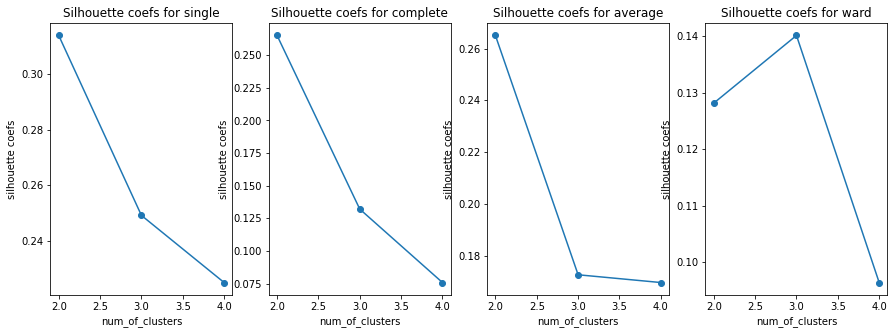

In [14]:
linkages = ['single', 'complete', 'average','ward']
ks = range(2,5)
fig = plt.figure(figsize=(15,5))
for idx,l in enumerate(linkages):
    silhouette = []
    for k in ks:
        model = AgglomerativeClustering(n_clusters=k,linkage=l)
        model.fit(X)
        silhouette_values = silhouette_score(X, model.labels_)
        silhouette.append(silhouette_values)
    fig.add_subplot(1, len(linkages), idx+1)

    plt.plot(ks, silhouette, marker="o")
    plt.ylabel('silhouette coefs')
    plt.xlabel('num_of_clusters')
    plt.title('Silhouette coefs for {}'.format(l))

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


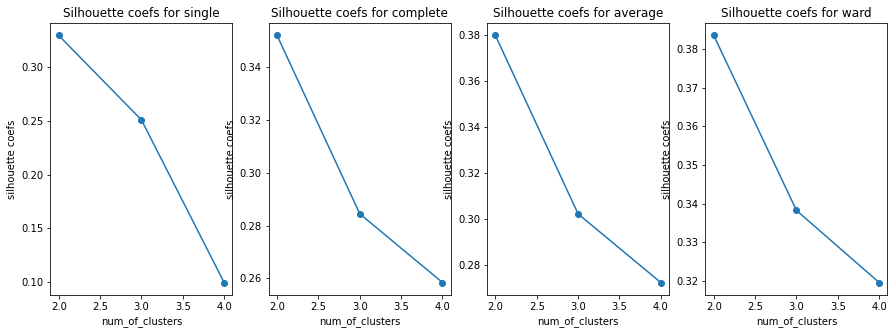

In [16]:
linkages = ['single', 'complete', 'average','ward']
ks = range(2,5)
fig = plt.figure(figsize=(15,5))
for idx,l in enumerate(linkages):
    silhouette = []
    for k in ks:
        model = AgglomerativeClustering(n_clusters=k,linkage=l)
        model.fit(X_pca)
        silhouette_values = silhouette_score(X_pca, model.labels_)
        silhouette.append(silhouette_values)
    fig.add_subplot(1, len(linkages), idx+1)

    plt.plot(ks, silhouette, marker="o")
    plt.ylabel('silhouette coefs')
    plt.xlabel('num_of_clusters')
    plt.title('Silhouette coefs for {}'.format(l))